# Database comparisons
The purpose of this notebook is to evaluate classification accuracy between different reference databases. Select mock community sequences are taxonomically classified using two or more different reference databases, e.g., Greengenes 13_8 [trimmed to 250 nt](./generate-tax-assignments.ipynb) and the same database [trimmed to 150 nt](./generate-tax-assignments-trimmed-dbs.ipynb). [This notebook](./generate-tax-assignments-trimmed-dbs.ipynb) can also be modified to provide taxonomic classification with any number of desired reference databases/versions. Limit the analysis to only a few mock communities and method/parameter combinations; the goal here is to compare the databases, not the methods.

In the example below, we compare RDP classifications of a single 16S rRNA dataset (mock-3) and a single fungal ITS dataset (mock-9) using three different reference databases: reference sequences that are full length (e.g., full 16S rRNA gene), trimmed to 250 nt (approximately full V4 gene), or trimmed to 150 nt or 100 nt (length of sequence read).

Prepare the environment
-----------------------

First we'll import various functions that we'll need for generating the report. 

In [8]:
%matplotlib inline
from os.path import join, expandvars
import pandas as pd
from tax_credit.plotting_functions import (pointplot_from_data_frame,
                                           boxplot_from_data_frame,
                                           heatmap_from_data_frame,
                                           per_level_kruskal_wallis)
from tax_credit.eval_framework import (evaluate_results,
                                       method_by_reference_comparison)

Configure local environment-specific values
-------------------------------------------

**This is the only cell that you will need to edit to generate basic reports locally.** After editing this cell, you can run all cells in this notebook to generate your analysis report. This will take a few minutes to run, as results are computed at multiple taxonomic levels.

Values in this cell will not need to be changed, with the exception of ``project_dir``, to generate the default results contained within tax-credit. To analyze results separately from the tax-credit precomputed results, other variables in this cell will need to be set.

In [9]:
## project_dir should be the directory where you've downloaded (or cloned) the 
## tax-credit repository. 
project_dir = expandvars("$HOME/Desktop/projects/tax-credit-data")

## expected_results_dir contains expected composition data in the structure
## expected_results_dir/<dataset name>/<reference name>/expected/
expected_results_dir = join(project_dir, "data/precomputed-results/", "mock-community")

## mock_results_fp designates the files to which summary results are written.
## If this file exists, it can be read in to generate results plots, instead
## of computing new scores.
mock_results_fp = join(expected_results_dir, 'mock_results.tsv')

## results_dirs should contain the directory or directories where
## results can be found. By default, this is the same location as expected 
## results included with the project. If other results should be included, 
## absolute paths to those directories should be added to this list.
results_dirs = [expected_results_dir]

## directory containing mock community data, e.g., feature table without taxonomy
mock_dir = join(project_dir, "data", "mock-community")

## Minimum number of times an OTU must be observed for it to be included in analyses. Edit this
## to analyze the effect of the minimum count on taxonomic results.
min_count = 1

## Define the range of taxonomic levels over which to compute accuracy scores.
## The default given below will compute order (level 2) through species (level 6)
taxonomy_level_range = range(2,7)

Find mock community pre-computed tables, expected tables, and "query" tables
----------------------------------------------------------------------------

Next we'll use the paths defined above to find all of the tables that will be compared. These include the *pre-computed result* tables (i.e., the ones that the new methods will be compared to), the *expected result* tables (i.e., the tables containing the known composition of the mock microbial communities), and the *query result* tables (i.e., the tables generated with the new method(s) that we want to compare to the *pre-computed result* tables).

In [18]:
dataset_ids = ['mock-3', 'mock-9']
method_ids = ['naive-bayes', 'rdp', 'blast+', 'uclust', 'vsearch']
ref_ids = ['gg_13_8_otus', 'gg_13_8_otus_clean_full16S', 'silva_123_v4_trim250', 
           'silva_123_clean_full16S', 'unite_20.11.2016', 'unite_20.11.2016_clean_fullITS']

In [20]:
mock_results = evaluate_results(results_dirs, 
                                expected_results_dir, 
                                mock_results_fp, 
                                mock_dir,
                                taxonomy_level_range=taxonomy_level_range, 
                                min_count=min_count,
                                taxa_to_keep=None, 
                                md_key='taxonomy', 
                                subsample=False,
                                per_seq_precision=True,
                                exclude=['other'],
                                append=True,
                                force=False,
                                backup=False)


/Users/nbokulich/Desktop/projects/tax-credit-data/data/precomputed-results/mock-community/mock_results.tsv already exists.
Reading in pre-computed evaluation results.
To overwrite, set force=True


/Users/nbokulich/Desktop/projects/tax-credit-code/tax_credit/eval_framework.py:460: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  mock_results = pd.DataFrame.from_csv(results_fp, sep='\t')


append==True and force==False
0 new results have been appended to results.


In [21]:
backup = mock_results


In [51]:
mock_results = backup


In [52]:
mock_results[(mock_results['Method'] == 'naive-bayes') &
             (mock_results['Dataset'] == 'mock-3') &
             (mock_results['Reference'] == 'silva_123_v4_trim250')]


,Dataset,Level,SampleID,Reference,Method,Parameters,Precision,Recall,F-measure,Taxon Accuracy Rate,Taxon Detection Rate
720,mock-3,2,HMPMockV1.1.Even1,silva_123_v4_trim250,naive-bayes,0.5,-1.0,-1.0,-1.0,1.000000,1.000000
721,mock-3,2,HMPMockV1.1.Even2,silva_123_v4_trim250,naive-bayes,0.5,-1.0,-1.0,-1.0,1.000000,1.000000
722,mock-3,2,HMPMockV1.2.Staggered1,silva_123_v4_trim250,naive-bayes,0.5,-1.0,-1.0,-1.0,1.000000,0.700000
723,mock-3,2,HMPMockV1.2.Staggered2,silva_123_v4_trim250,naive-bayes,0.5,-1.0,-1.0,-1.0,1.000000,0.600000
724,mock-3,3,HMPMockV1.1.Even1,silva_123_v4_trim250,naive-bayes,0.5,-1.0,-1.0,-1.0,1.000000,0.923077
725,mock-3,3,HMPMockV1.1.Even2,silva_123_v4_trim250,naive-bayes,0.5,-1.0,-1.0,-1.0,1.000000,1.000000
726,mock-3,3,HMPMockV1.2.Staggered1,silva_123_v4_trim250,naive-bayes,0.5,-1.0,-1.0,-1.0,1.000000,0.692308
727,mock-3,3,HMPMockV1.2.Staggered2,silva_123_v4_trim250,naive-bayes,0.5,-1.0,-1.0,-1.0,1.000000,0.615385
728,mock-3,4,HMPMockV1.1.Even1,silva_123_v4_trim250,naive-bayes,0.5,-1.0,-1.0,-1.0,1.000000,0.944444
729,mock-3,4,HMPMockV1.1.Even2,silva_123_v4_trim250,naive-bayes,0.5,-1.0,-1.0,-1.0,1.000000,1.000000


Restrict analyses to a set of datasets used for purpose of reference database comparisons.

In [55]:
mock_results = mock_results[mock_results['Method'].isin(['naive-bayes', 'rdp', 'blast+', 'uclust', 'vsearch'])]
mock_results = mock_results[mock_results['Dataset'].isin(['mock-3', 'mock-9'])]
mock_results = mock_results[mock_results['Reference'].isin(
    ['gg_13_8_otus', 'gg_13_8_otus_full16S', 'silva_123_v4_trim250', 'silva_123_clean_full16S', 
     'unite_20.11.2016', 'unite_20.11.2016_clean_fullITS'])]
mock_results = mock_results[mock_results['Parameters'].isin(
    ['0.5', '0.8', '0.001:char:8192:[8,8]:0.5', '0.001:char:8192:[8,8]:0.8',
     '0.001:char:8192:[7,7]:0.5', '0.001:char:8192:[7,7]:0.8'
     '0.001:1:0.51:0.8', '0.001:10:0.51:0.8', '0.001:1:0.51:0.99', '0.001:10:0.51:0.99',
     '0.001:1:0.99:0.8', '0.001:10:0.99:0.8', '0.001:1:0.99:0.99', '0.001:10:0.99:0.99',
     '1:0.51:0.8', '10:0.51:0.8', '1:0.51:0.99', '10:0.51:0.99',
     '1:0.99:0.8', '10:0.99:0.8', '1:0.99:0.99', '10:0.99:0.99',
     '0.51:0.9:1', '0.51:0.9:3', '0.51:0.9:5', '0.51:0.97:1',
     '0.51:0.97:3', '0.51:0.97:5', '0.51:0.99:1', '0.51:0.99:3',
     '0.51:0.99:5', '0.76:0.9:1', '0.76:0.9:3', '0.76:0.9:5',
     '0.76:0.97:1', '0.76:0.97:3', '0.76:0.97:5', '0.76:0.99:1',
     '0.76:0.99:3', '0.76:0.99:5', '1.0:0.9:1', '1.0:0.9:3', '1.0:0.9:5',
     '1.0:0.97:1', '1.0:0.97:3', '1.0:0.97:5', '1.0:0.99:1',
     '1.0:0.99:3', '1.0:0.99:5'])]


Evalution 1: Compute and summarize precision, recall, and F-measure for mock communities
----------------------------------------------------------------------------------------

In this evaluation, we compute and summarize precision, recall, and F-measure of each result (pre-computed and query) based on the known composition of the mock communities. We then summarize the results in two ways: first with boxplots, and second with a table of the top methods based on their F-measures. 

This is a qualitative evaluation, effectively telling us about the ability of the different methods to report the taxa that are present in each sample. These metrics are not concerned with the abundance of the different taxa.

As a first step, we will evaluate how accuracy metrics perform at each taxonomic level for each method within each reference dataset type. We can evaluate this for each method individually, as is currently set for q2-feature-classifier naive bayes classifier.

In [56]:
color_palette = {# 16S refs
                  'gg_13_8_otus': 'orange', 
                  #'gg_13_8_otus_clean': 'seagreen', # 515f-806r
                  #'gg_13_8_otus_clean_trim150': 'blue', # 515f-806r
                  'gg_13_8_otus_full16S': 'purple',
                  'silva_123_v4_trim250': 'blue',
                  #'silva_123_clean_v4_trim250': 'red',
                  'silva_123_clean_full16S': 'red',
                  # ITS Refs
                  'unite_20.11.2016': 'orange', 
                  #'unite_20.11.2016_clean': 'seagreen', # ITS1Ff-ITS2r
                  #'unite_20.11.2016_clean_trim100': 'blue', # ITS1Ff-ITS2r
                  'unite_20.11.2016_clean_fullITS': 'purple', 
                  #'unite_20.11.2016_clean_trim150': 'cyan' # ITS1Ff-ITS2r
}

y_vars = ["Precision", "Recall", "F-measure", "Taxon Accuracy Rate", "Taxon Detection Rate"]

/Users/nbokulich/miniconda3/envs/qiime2-2017.11/lib/python3.5/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


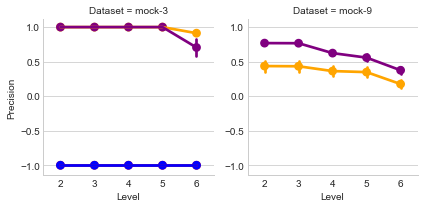

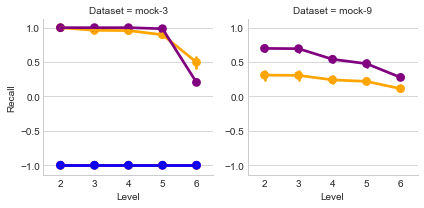

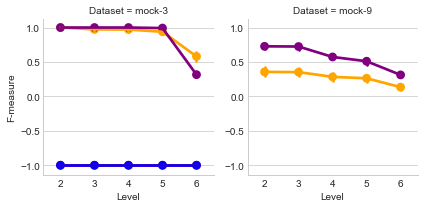

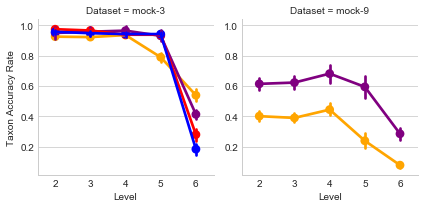

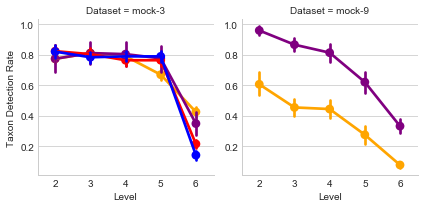

{'F-measure': <seaborn.axisgrid.FacetGrid at 0x1a22456898>,
 'Precision': <seaborn.axisgrid.FacetGrid at 0x1a27097048>,
 'Recall': <seaborn.axisgrid.FacetGrid at 0x1a2728b588>,
 'Taxon Accuracy Rate': <seaborn.axisgrid.FacetGrid at 0x1a224ddef0>,
 'Taxon Detection Rate': <seaborn.axisgrid.FacetGrid at 0x1a276e05c0>}

In [57]:
pointplot_from_data_frame(mock_results[mock_results['Method'].isin(['naive-bayes', 'blast+', 'vsearch'])],
                          "Level", y_vars, group_by="Dataset", color_by="Reference",
                          color_palette=color_palette)

/Users/nbokulich/miniconda3/envs/qiime2-2017.11/lib/python3.5/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


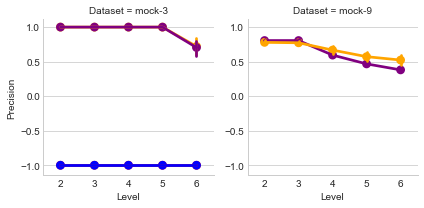

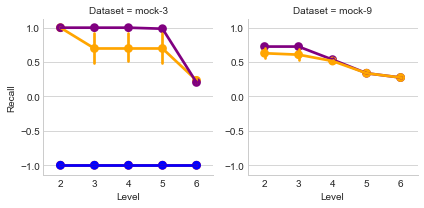

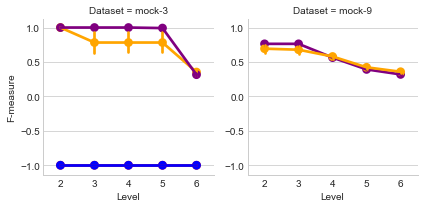

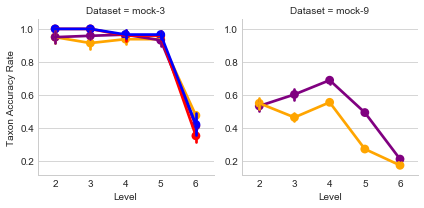

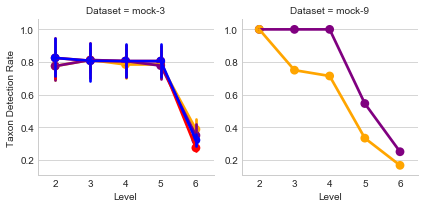

{'F-measure': <seaborn.axisgrid.FacetGrid at 0x1a27c27ba8>,
 'Precision': <seaborn.axisgrid.FacetGrid at 0x1a276ec160>,
 'Recall': <seaborn.axisgrid.FacetGrid at 0x1a27b2aa20>,
 'Taxon Accuracy Rate': <seaborn.axisgrid.FacetGrid at 0x1a27d1f438>,
 'Taxon Detection Rate': <seaborn.axisgrid.FacetGrid at 0x1a27db4b70>}

In [58]:
pointplot_from_data_frame(mock_results[mock_results['Method'] == 'naive-bayes'], "Level", y_vars, 
                          group_by="Dataset", color_by="Reference",
                          color_palette=color_palette)

/Users/nbokulich/miniconda3/envs/qiime2-2017.11/lib/python3.5/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


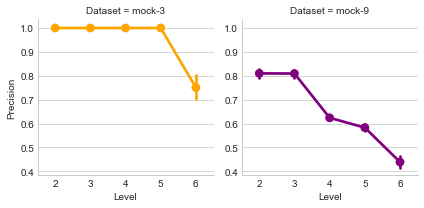

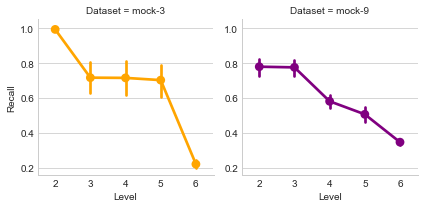

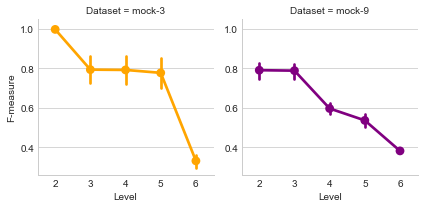

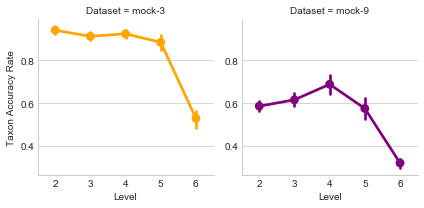

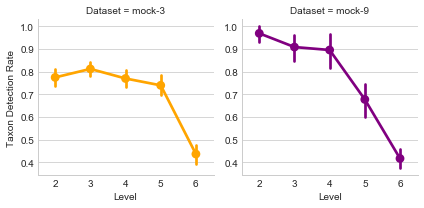

{'F-measure': <seaborn.axisgrid.FacetGrid at 0x1a23a4c080>,
 'Precision': <seaborn.axisgrid.FacetGrid at 0x1a23730d30>,
 'Recall': <seaborn.axisgrid.FacetGrid at 0x1a239857b8>,
 'Taxon Accuracy Rate': <seaborn.axisgrid.FacetGrid at 0x1a23b177f0>,
 'Taxon Detection Rate': <seaborn.axisgrid.FacetGrid at 0x1a237374e0>}

In [39]:
pointplot_from_data_frame(mock_results[mock_results['Method'] == 'rdp'], "Level", y_vars, 
                          group_by="Dataset", color_by="Reference",
                          color_palette=color_palette)

/Users/nbokulich/miniconda3/envs/qiime2-2017.11/lib/python3.5/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


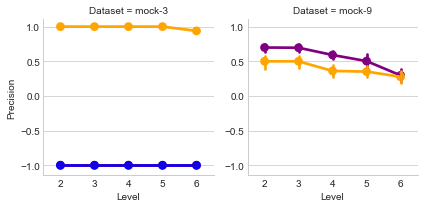

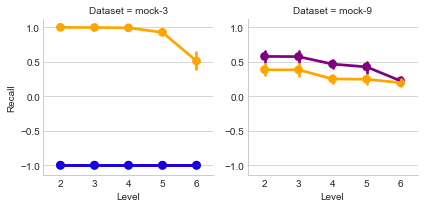

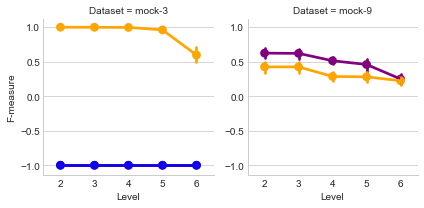

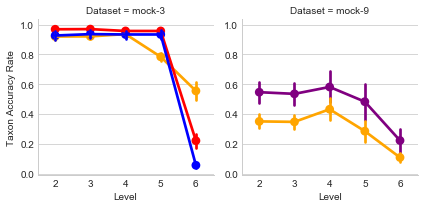

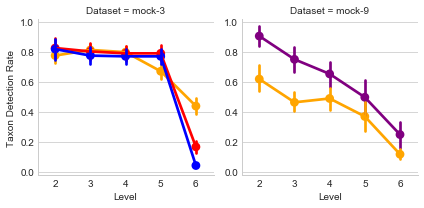

{'F-measure': <seaborn.axisgrid.FacetGrid at 0x1a283177b8>,
 'Precision': <seaborn.axisgrid.FacetGrid at 0x1a27dab550>,
 'Recall': <seaborn.axisgrid.FacetGrid at 0x1a282267b8>,
 'Taxon Accuracy Rate': <seaborn.axisgrid.FacetGrid at 0x1a28419c18>,
 'Taxon Detection Rate': <seaborn.axisgrid.FacetGrid at 0x1a28462ac8>}

In [59]:
pointplot_from_data_frame(mock_results[mock_results['Method'] == 'blast+'], "Level", y_vars, 
                          group_by="Dataset", color_by="Reference",
                          color_palette=color_palette)

/Users/nbokulich/miniconda3/envs/qiime2-2017.11/lib/python3.5/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


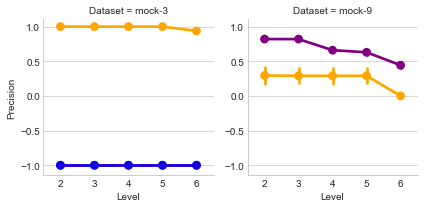

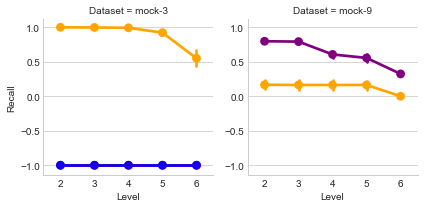

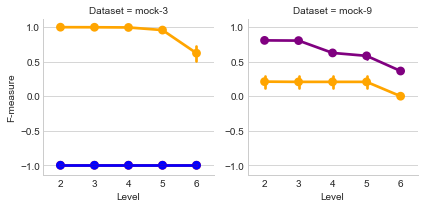

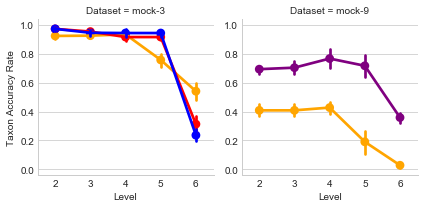

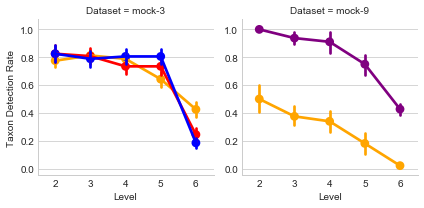

{'F-measure': <seaborn.axisgrid.FacetGrid at 0x1a2860d3c8>,
 'Precision': <seaborn.axisgrid.FacetGrid at 0x1a26db55f8>,
 'Recall': <seaborn.axisgrid.FacetGrid at 0x1a288b2d30>,
 'Taxon Accuracy Rate': <seaborn.axisgrid.FacetGrid at 0x1a28a98f28>,
 'Taxon Detection Rate': <seaborn.axisgrid.FacetGrid at 0x1a28b90e48>}

In [60]:
pointplot_from_data_frame(mock_results[mock_results['Method'] == 'vsearch'], "Level", y_vars, 
                          group_by="Dataset", color_by="Reference",
                          color_palette=color_palette)

/Users/nbokulich/miniconda3/envs/qiime2-2017.11/lib/python3.5/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


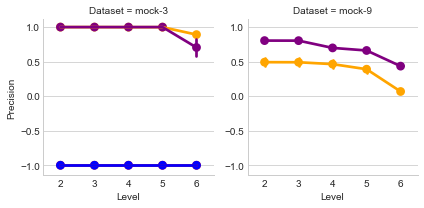

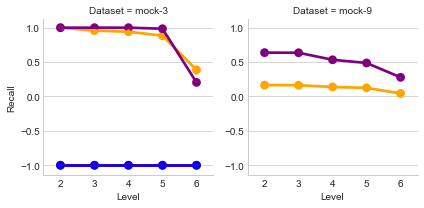

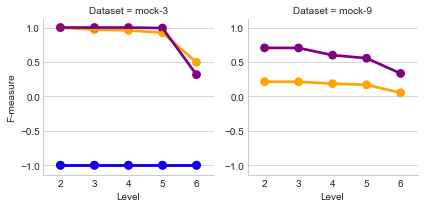

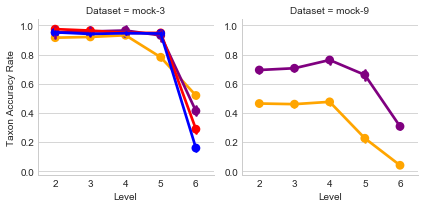

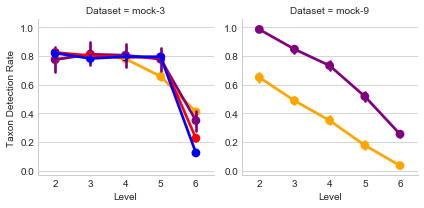

{'F-measure': <seaborn.axisgrid.FacetGrid at 0x1a2906c860>,
 'Precision': <seaborn.axisgrid.FacetGrid at 0x1a27f49668>,
 'Recall': <seaborn.axisgrid.FacetGrid at 0x1a28f59d68>,
 'Taxon Accuracy Rate': <seaborn.axisgrid.FacetGrid at 0x1a29171ba8>,
 'Taxon Detection Rate': <seaborn.axisgrid.FacetGrid at 0x1a29298240>}

In [61]:
pointplot_from_data_frame(mock_results, "Level", y_vars, 
                          group_by="Dataset", color_by="Reference",
                          color_palette=color_palette)

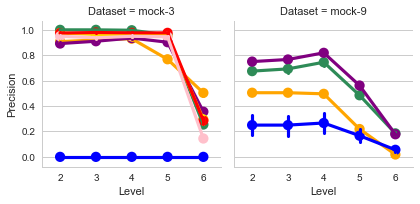

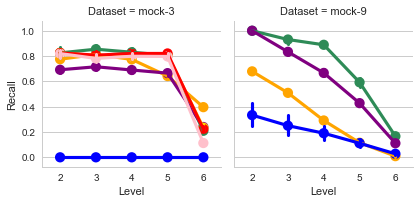

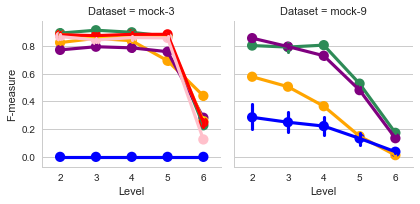

In [20]:
pointplot_from_data_frame(mock_results[mock_results['Method'] == 'uclust'], "Level", y_vars, 
                          group_by="Dataset", color_by="Reference",
                          color_palette=color_palette)

Kruskal-Wallis FDR-corrected p-values comparing reference database / method combinations at each level of taxonomic assignment

In [21]:
result = per_level_kruskal_wallis(mock_results, y_vars, group_by='Reference', 
                                  dataset_col='Dataset', level_name='Level',
                                  levelrange=range(2,7), alpha=0.05, 
                                  pval_correction='fdr_bh')
result

,Dataset,Variable,2,3,4,5,6
0,mock-3,Precision,5.113689e-116,1.552753e-115,2.312131e-100,2.498765e-207,6.371697e-167
1,mock-3,Recall,3.100730e-64,2.671537e-55,3.769743e-64,1.776997e-92,6.718745e-171
2,mock-3,F-measure,2.958127e-69,2.785821e-58,2.033205e-74,8.220949e-133,4.999565e-175
3,mock-9,Precision,7.316974e-86,1.845363e-82,1.860603e-94,4.041060e-105,1.040389e-128
4,mock-9,Recall,3.764580e-101,1.307634e-109,5.804092e-103,6.494176e-103,7.778683e-128
5,mock-9,F-measure,6.920112e-100,8.424047e-100,3.355415e-108,9.091524e-114,1.854305e-132


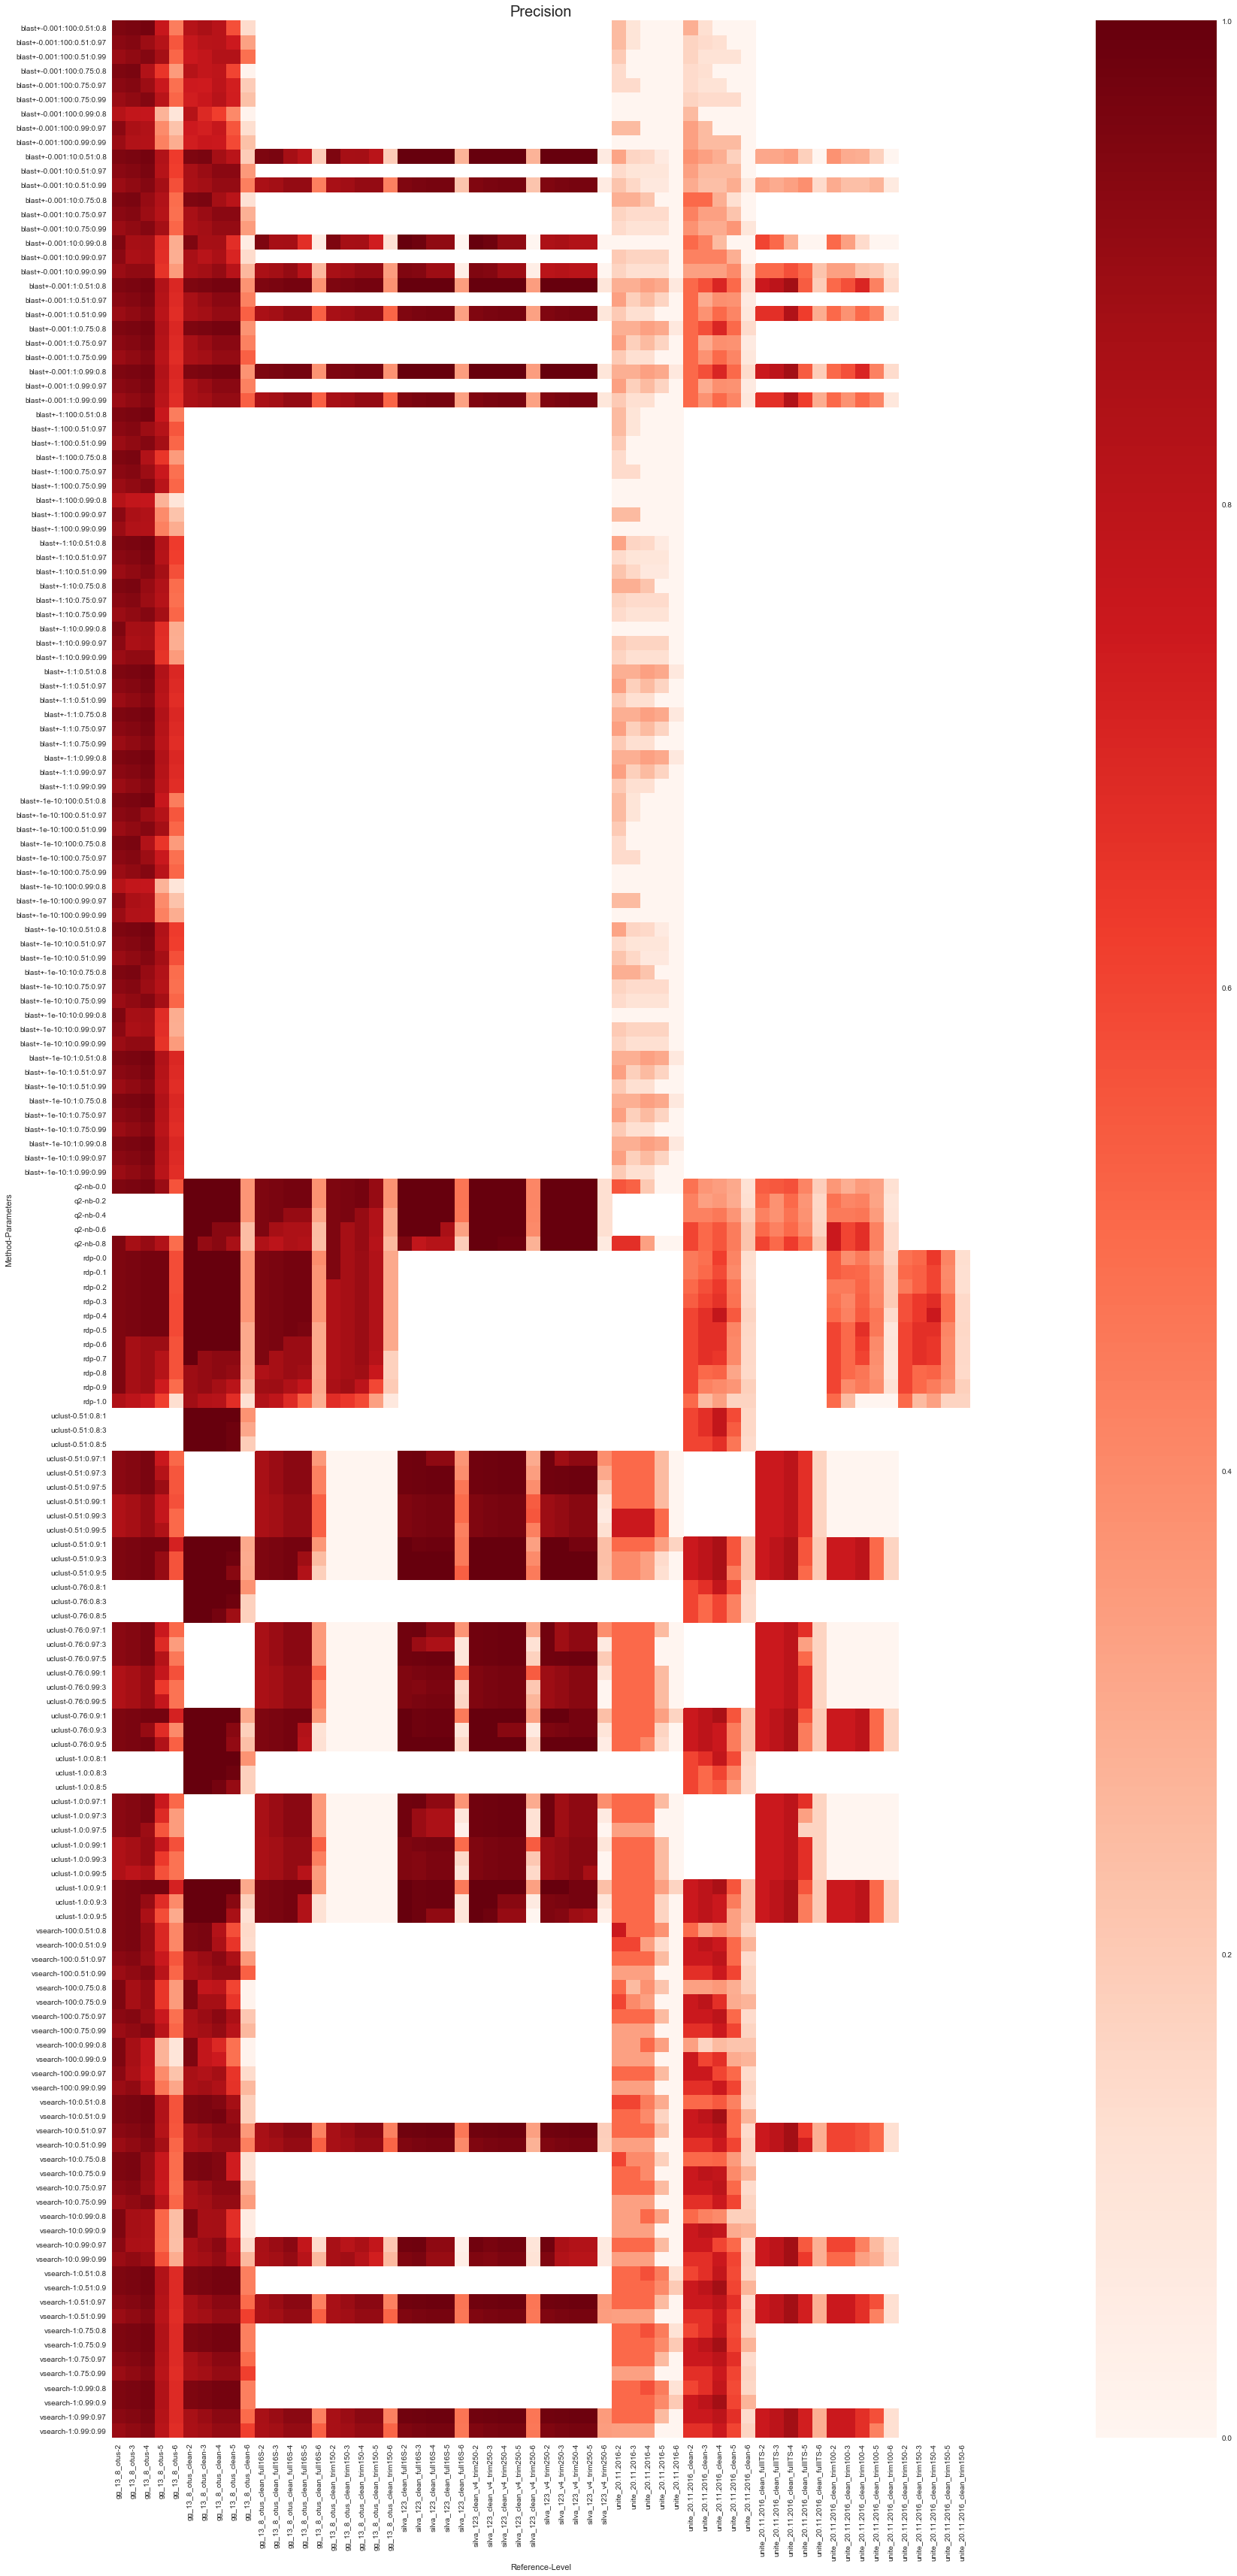

In [22]:
heatmap_from_data_frame(mock_results, metric="Precision", rows=["Method", "Parameters"], cols=["Reference", "Level"])

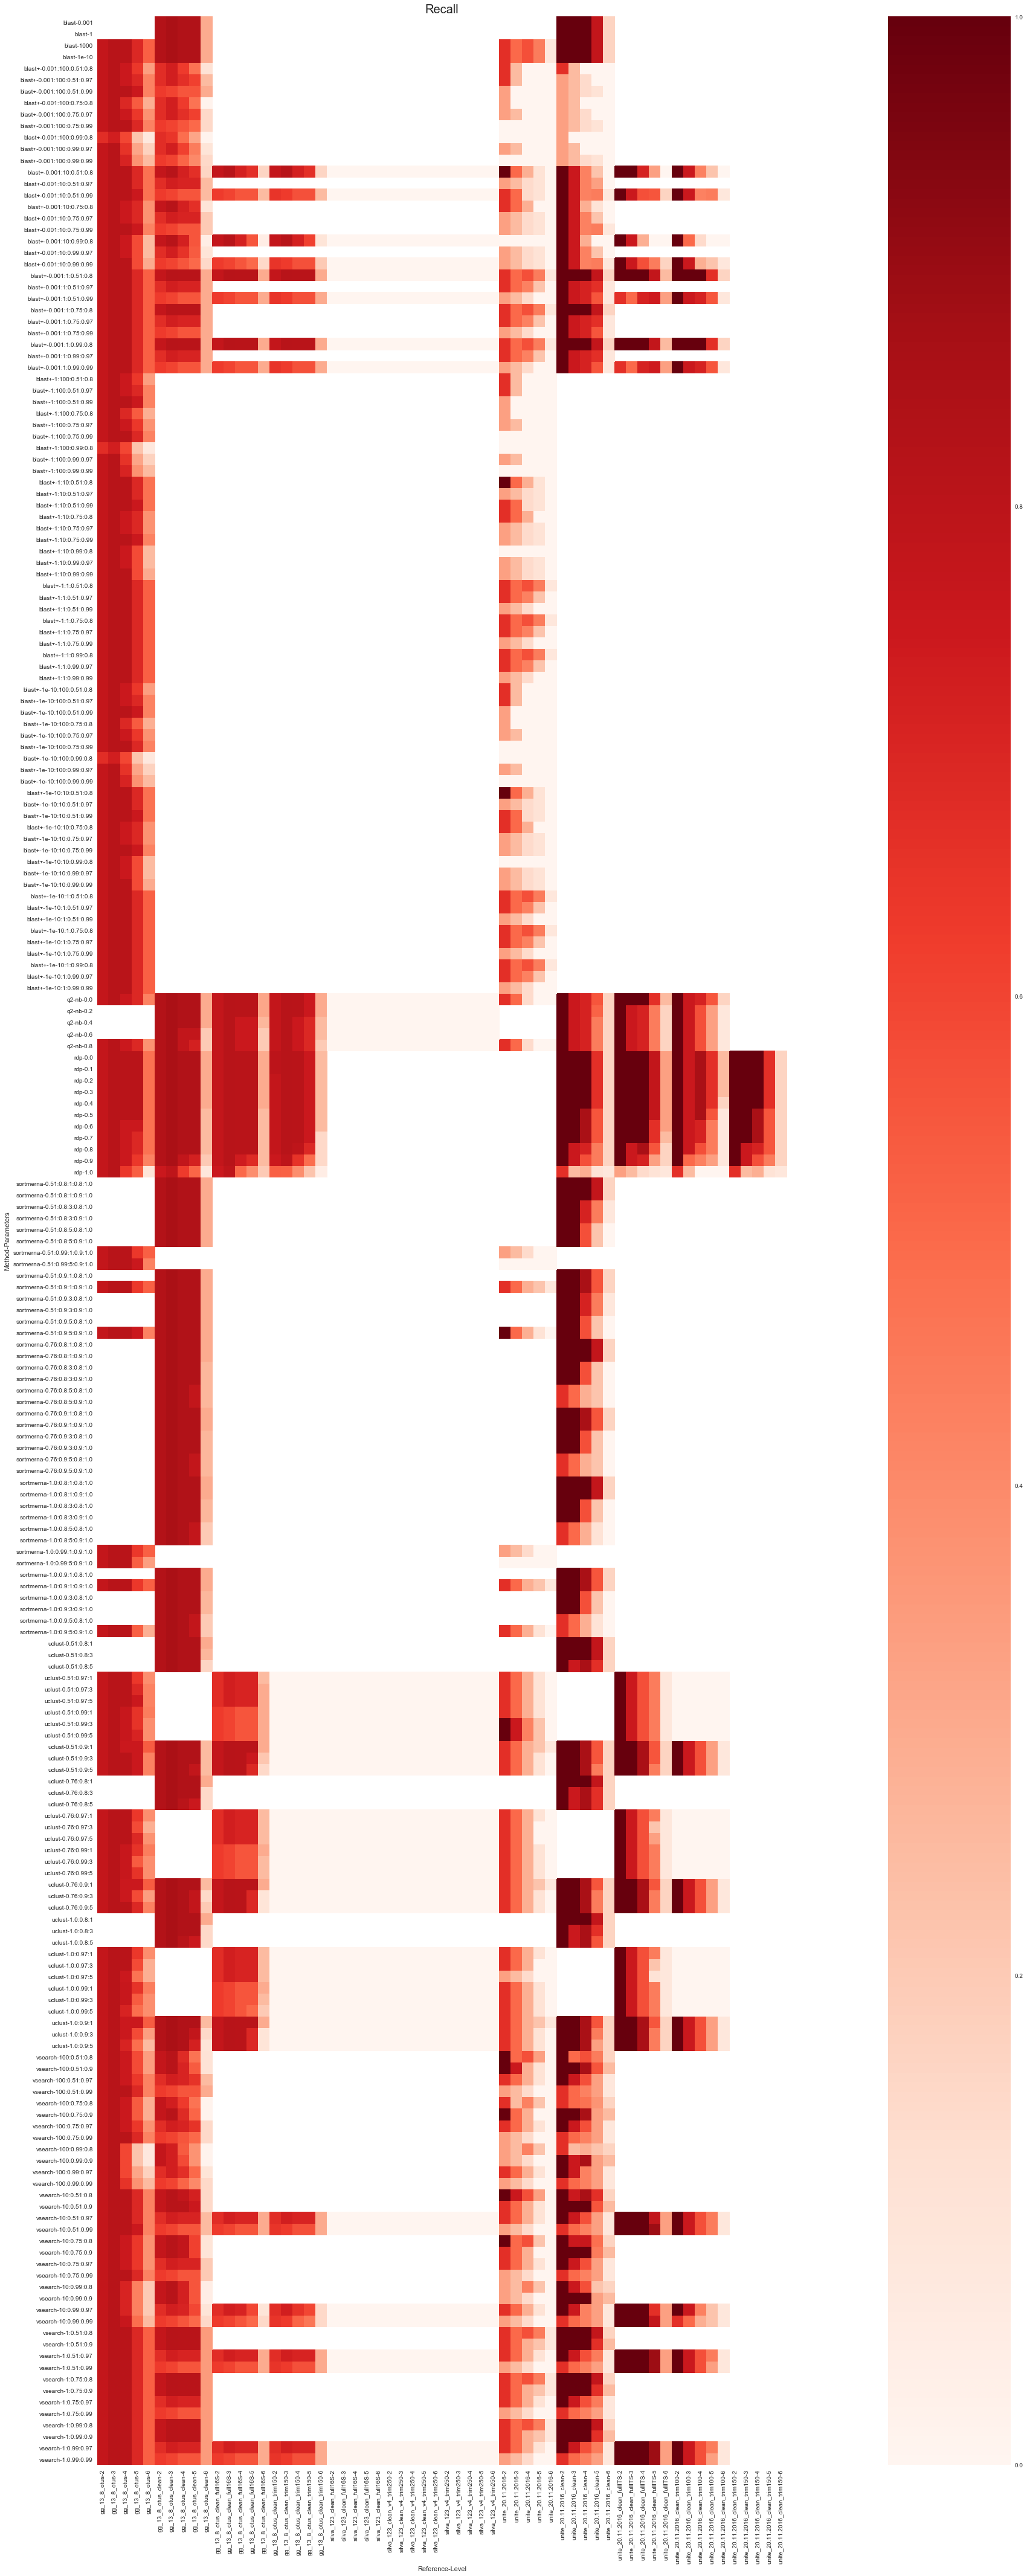

In [21]:
heatmap_from_data_frame(mock_results, metric="Recall", rows=["Method", "Parameters"], cols=["Reference", "Level"])

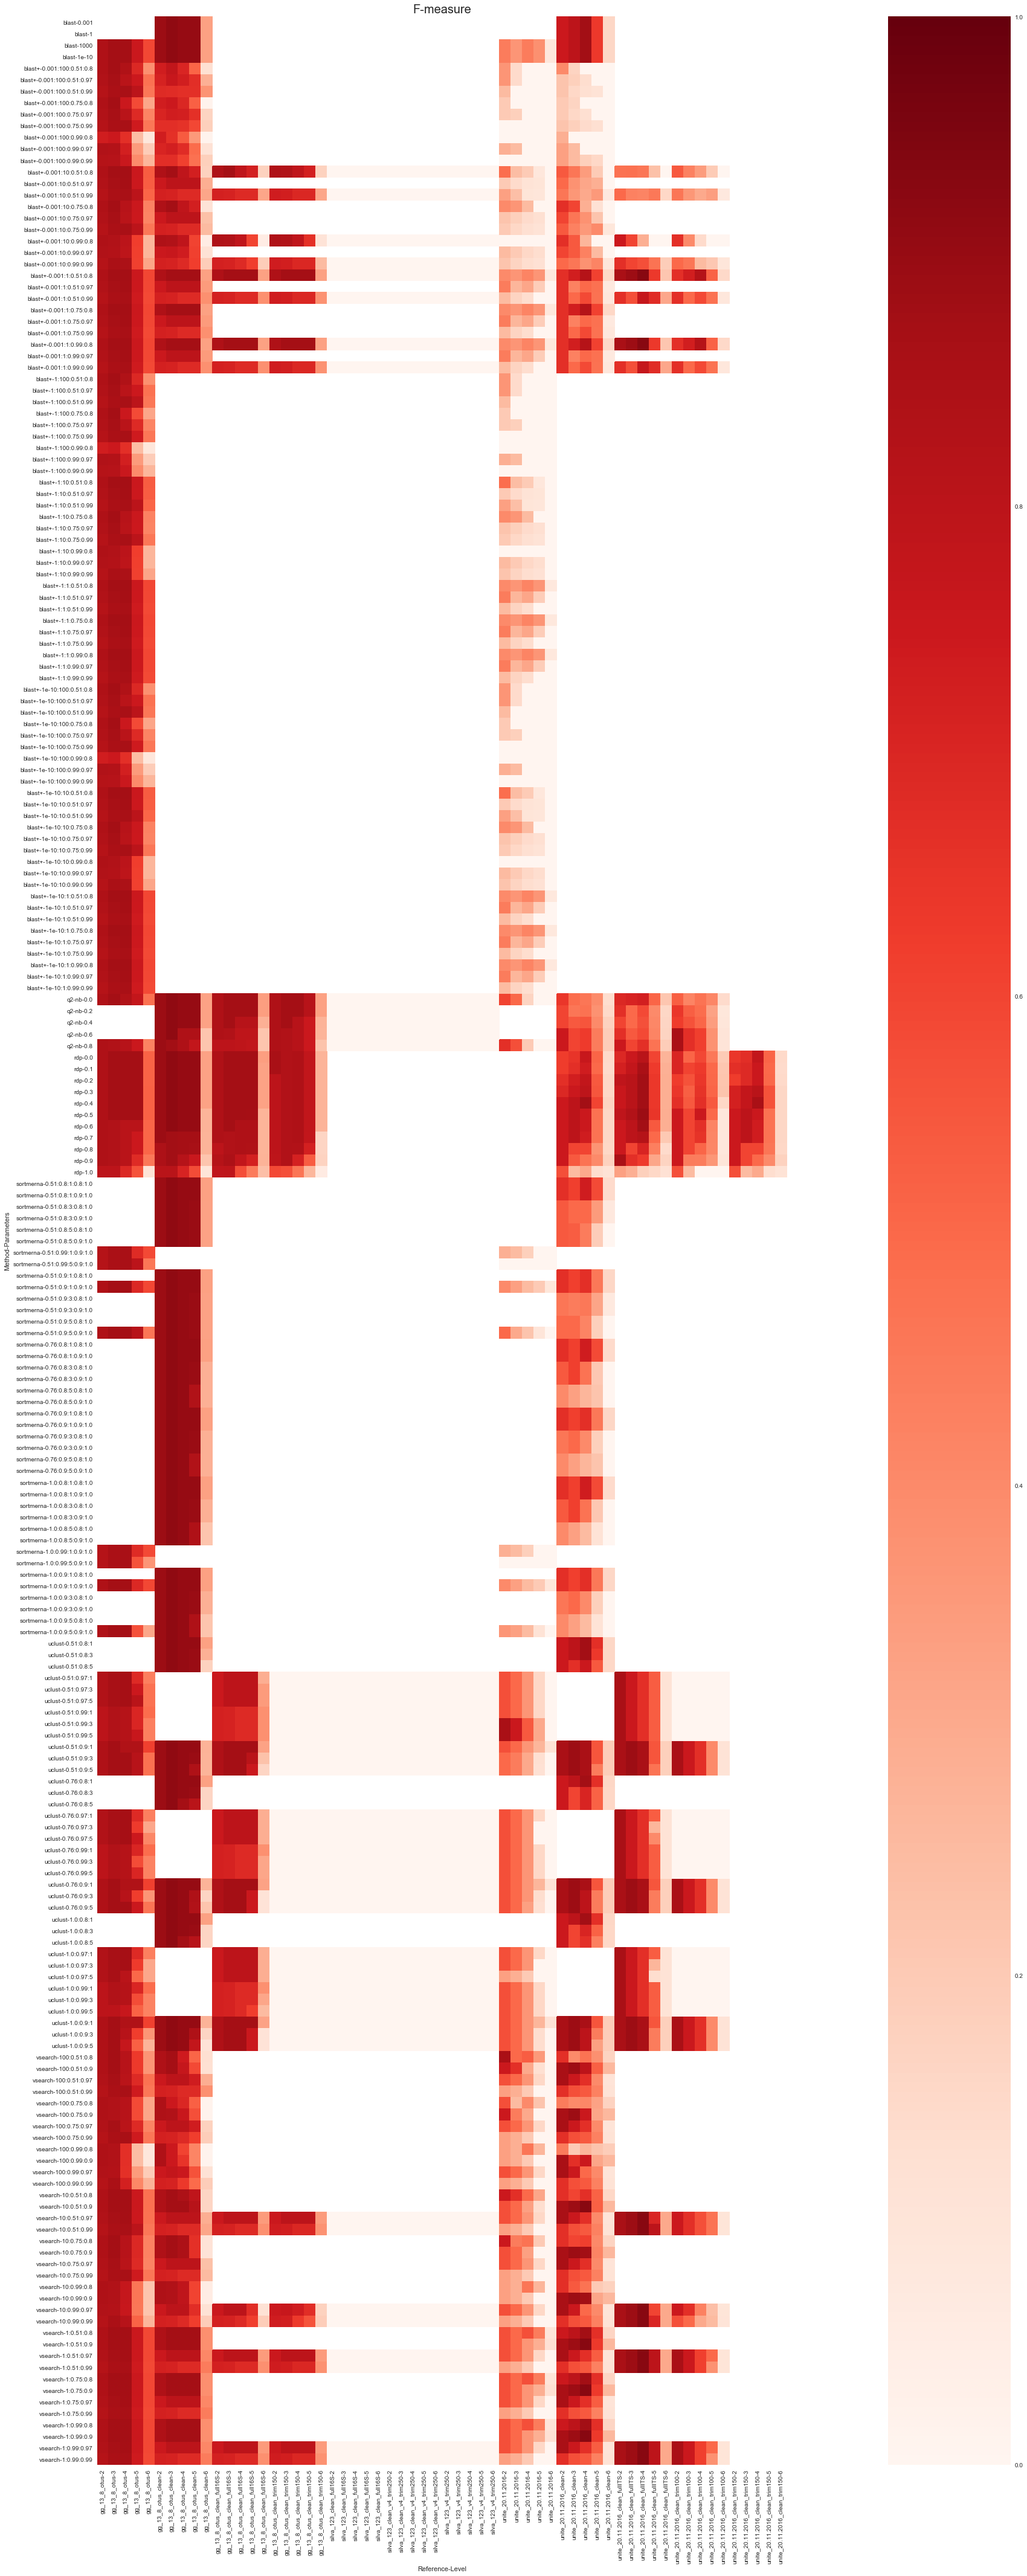

In [22]:
heatmap_from_data_frame(mock_results, metric="F-measure", rows=["Method", "Parameters"], cols=["Reference", "Level"])

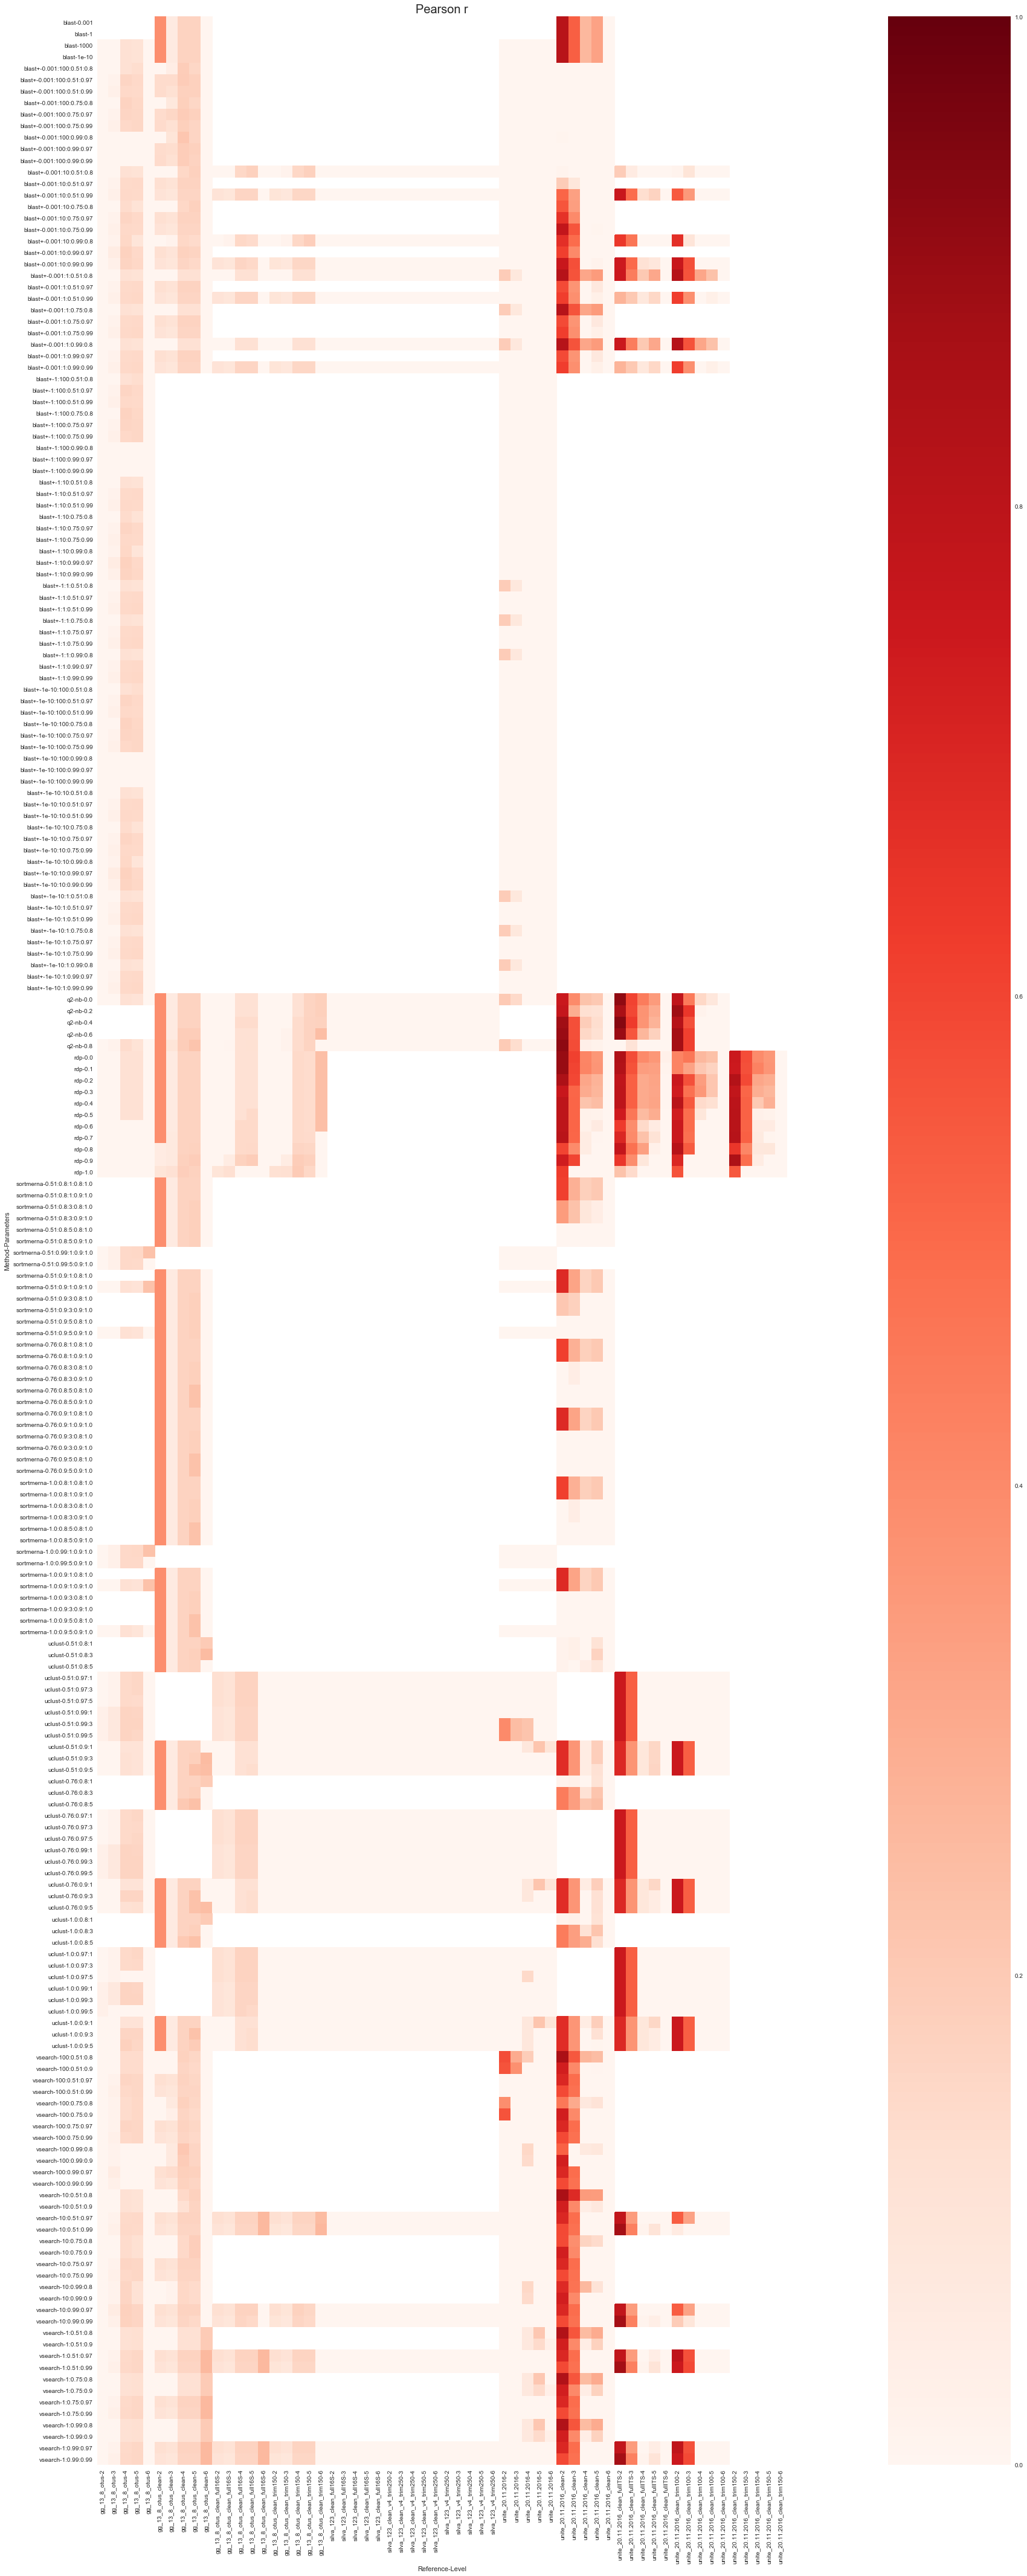

In [23]:
heatmap_from_data_frame(mock_results, metric="Pearson r", rows=["Method", "Parameters"], cols=["Reference", "Level"])

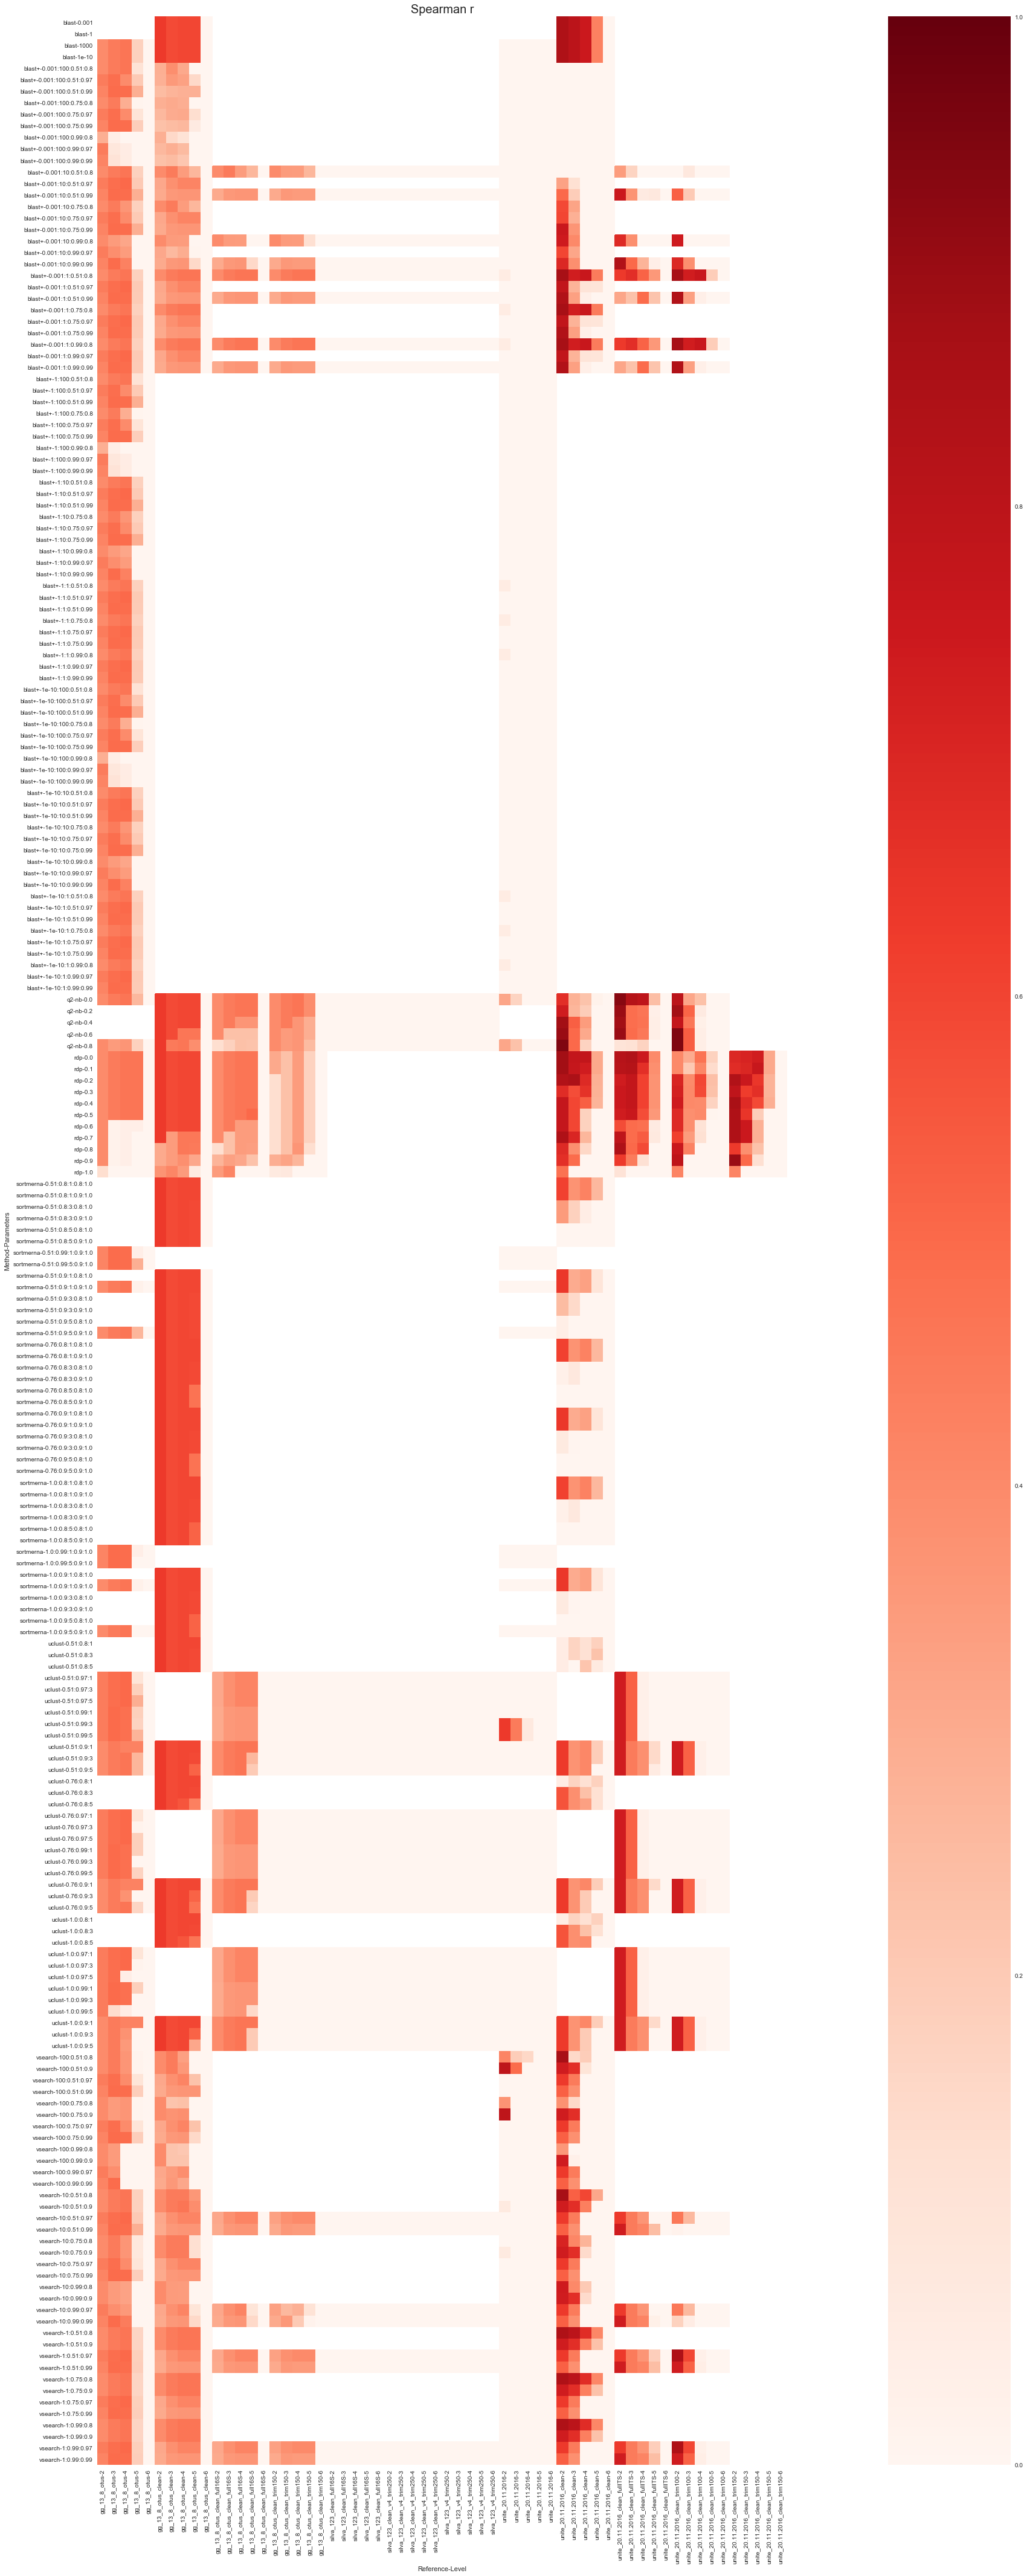

In [24]:
heatmap_from_data_frame(mock_results, metric="Spearman r", rows=["Method", "Parameters"], cols=["Reference", "Level"])

Now we will focus on results at genus level (for species level, change to level 6)

In [25]:
mock_results_6 = mock_results[mock_results['Level'] == 5]

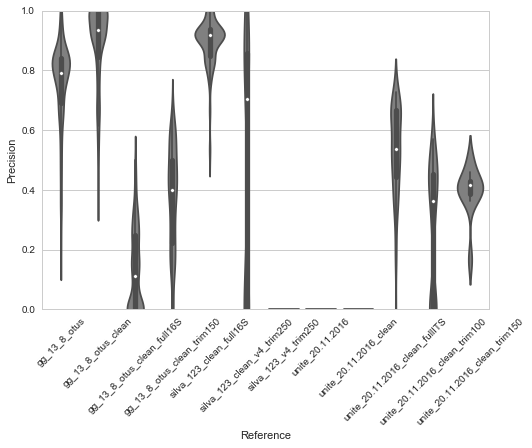

In [26]:
boxplot_from_data_frame(mock_results_6, group_by="Reference", metric="Precision")

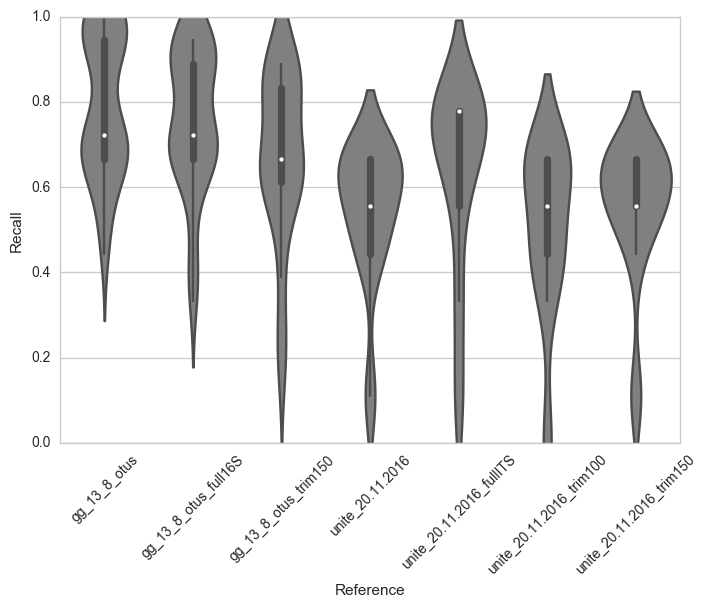

In [15]:
boxplot_from_data_frame(mock_results_6, group_by="Reference", metric="Recall")

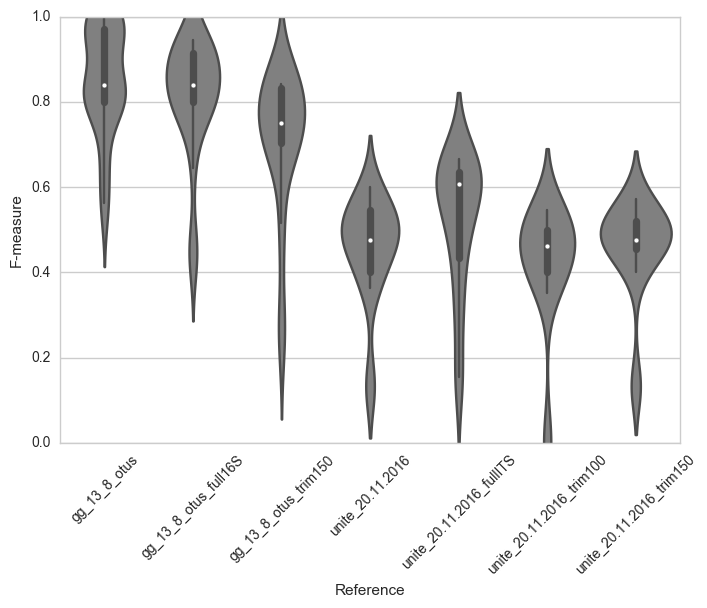

In [16]:
boxplot_from_data_frame(mock_results_6, group_by="Reference", metric="F-measure")

In [17]:
method_by_reference_comparison(mock_results)

,Reference,Level,Method,Parameters,Precision,Recall,F-measure
3659,gg_13_8_otus,4,rdp,0.6,1.000000,1.000000,1.000000
4859,gg_13_8_otus_full16S,4,rdp,0.1,0.944444,0.944444,0.944444
5199,gg_13_8_otus_trim150,4,rdp,0.7,0.850000,0.944444,0.894737
3663,gg_13_8_otus,5,rdp,0.6,1.000000,1.000000,1.000000
4863,gg_13_8_otus_full16S,5,rdp,0.1,0.944444,0.944444,0.944444
5123,gg_13_8_otus_trim150,5,rdp,0.3,0.800000,0.888889,0.842105
3548,gg_13_8_otus,6,rdp,0.0,0.461538,0.300000,0.363636
4848,gg_13_8_otus_full16S,6,rdp,0.0,0.500000,0.300000,0.375000
5168,gg_13_8_otus_trim150,6,rdp,0.5,0.384615,0.250000,0.303030
11263,unite_20.11.2016,4,rdp,0.4,0.777778,1.000000,0.875000


Evaluation 2: Compute and summarize correlations between observed and known mock community structure
----------------------------------------------------------------------------------------------------

In this evaluation, we compute and summarize the correlation between each result (pre-computed and query) and the known composition of the mock communities. We then summarize the results in two ways: first with a series of boxplots of correlation coefficients by method; and second with a table of the top methods based on their Pearson correlation coefficient. 

This is a quantitative evaluation, which tells us about the ability of the different methods to report the taxa that are present in each sample and accurately assess their abundance. Because many factors can affect the observed abundance of taxa beyond the accuracy of the taxonomic assigner (e.g., primer bias), the correlation coefficients are frequently low, but we expect that their relative values are informative in understanding which taxonomic assigners are more correct than others.

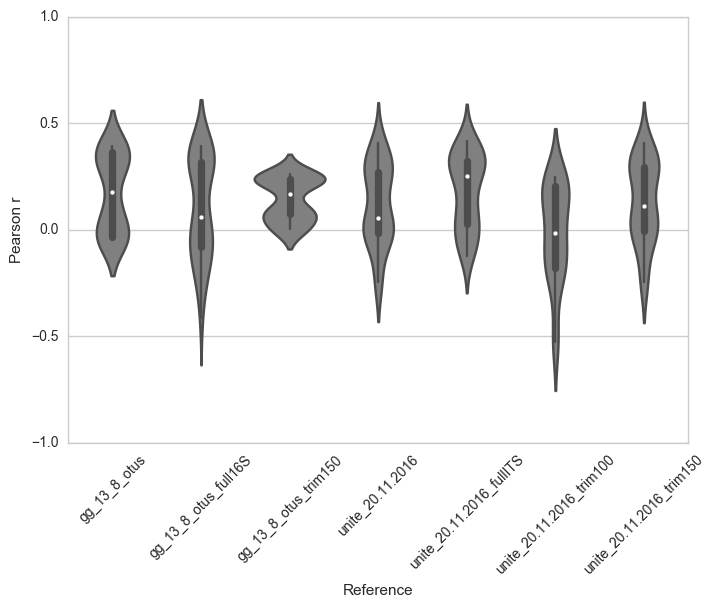

In [18]:
boxplot_from_data_frame(mock_results_6, group_by="Reference", metric="Pearson r", y_min=None)

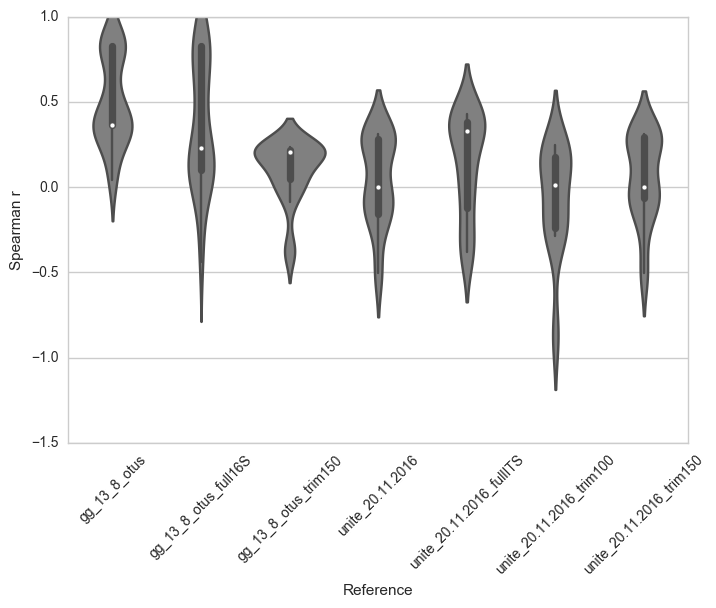

In [19]:
boxplot_from_data_frame(mock_results_6, group_by="Reference", metric="Spearman r", y_min=None)

In [20]:
method_by_reference_comparison(mock_results, sort_field="Spearman r",
                               display_fields=("Reference", "Level",
                                               "Method", "Parameters",
                                               "Pearson r", "Spearman r"))

,Reference,Level,Method,Parameters,Pearson r,Spearman r
3640,gg_13_8_otus,4,rdp,0.5,0.391337,0.834849
4940,gg_13_8_otus_full16S,4,rdp,0.5,0.391337,0.834849
5160,gg_13_8_otus_trim150,4,rdp,0.5,0.286989,0.562133
3644,gg_13_8_otus,5,rdp,0.5,0.391337,0.834849
4944,gg_13_8_otus_full16S,5,rdp,0.5,0.328646,0.834849
5223,gg_13_8_otus_trim150,5,rdp,0.8,0.101424,0.235419
3548,gg_13_8_otus,6,rdp,0.0,-0.078212,-0.212880
4848,gg_13_8_otus_full16S,6,rdp,0.0,-0.021617,-0.100261
5168,gg_13_8_otus_trim150,6,rdp,0.5,0.436463,-0.266088
11202,unite_20.11.2016,4,rdp,0.0,0.504201,0.800656
